In [27]:
from PIL import Image, ImageDraw, ImageFilter
import numpy as np
import matplotlib.pylab as plt
from skimage import metrics
import cv2
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr


In [28]:
width = 35.8
resolution = 6000
delta = width/resolution


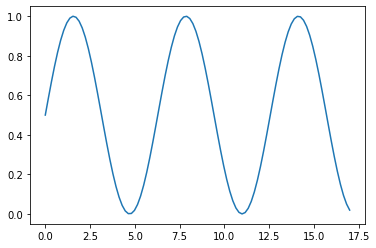

In [29]:
A= 1
# W=np.pi/2
W=0
y = lambda x: (0.5+ 0.5 * np.sin(A*x + W)) 
fig = plt.subplots()
x = np.linspace(0, 17,100)
plt.plot(x, y(x))
plt.show()



[0.50149166 0.50447492 0.50745802 ... 0.02069135 0.01985059 0.01902692]
(2850, 2850)


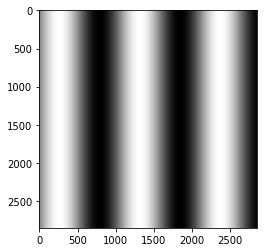

In [30]:
#функция дискретизации
def function(a):
    return (0.5 + 0.5 * np.sin(A*a + W))
    
def functionDis(delta):
    dis = []
    y = 0
    while y <= 17:
        dis.append((function(y) + function(y + delta)) / 2)
        y += delta 
    return np.array(dis)

b = functionDis(delta)
print (b)

def image(p):
    p = p * 255
    image = np.full((len(p), len(p)), fill_value=p)
    plt.imshow(image, cmap="gray")
    return image

pic = image(b)

print (pic.shape)


In [31]:
#@title Параметры { run: "auto" }
low =  0#@param {type:"number"}
upper =  1#@param {type:"number"}
level =  64#@param {type:"number"}

def quantization(b, low, upper, level):
    A = []
    levels = []
    while low <= upper:
        levels.append(low)
        low += 1/level

    print(levels)
    for i in b:
       for j in range(len(levels)):
           if i < levels[j]: 
                if i < (levels[j-1] + levels[j]) / 2:
                    A.append(levels[j-1])
                    break
                else:
                    A.append(levels[j])
                    break
    return np.array(A)


[0, 0.015625, 0.03125, 0.046875, 0.0625, 0.078125, 0.09375, 0.109375, 0.125, 0.140625, 0.15625, 0.171875, 0.1875, 0.203125, 0.21875, 0.234375, 0.25, 0.265625, 0.28125, 0.296875, 0.3125, 0.328125, 0.34375, 0.359375, 0.375, 0.390625, 0.40625, 0.421875, 0.4375, 0.453125, 0.46875, 0.484375, 0.5, 0.515625, 0.53125, 0.546875, 0.5625, 0.578125, 0.59375, 0.609375, 0.625, 0.640625, 0.65625, 0.671875, 0.6875, 0.703125, 0.71875, 0.734375, 0.75, 0.765625, 0.78125, 0.796875, 0.8125, 0.828125, 0.84375, 0.859375, 0.875, 0.890625, 0.90625, 0.921875, 0.9375, 0.953125, 0.96875, 0.984375, 1.0]
(2850, 2850)
0.005
47.0823
0.979


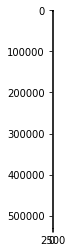

In [32]:

N = quantization(b, low, upper, level)
picQ = image(N)   
print (picQ.shape) 

pic = np.resize(pic, picQ.shape)

MSE = round(mse(pic,picQ) /255, 4)

print (MSE)

PSNR = round(psnr(pic,picQ, data_range=255), 4)
print(PSNR)

SSIM = round((ssim(pic,picQ, data_range=255)), 4)
print(SSIM)

#Гистограмма
plt.hist(picQ.ravel(), 255, [0,256])
plt.show()


In [33]:
#функция неравномерного квантования 
def irregular_quantization(b, low, upper, levels):
    A = []
    print(levels)
    for i in b:
       for j in range(len(levels)):
           if i < levels[j]: 
                if i < (levels[j-1] + levels[j]) / 2:
                    A.append(levels[j-1])
                    break
                else:
                    A.append(levels[j])
                    break
    return np.array(A)



[1e-06, 0.005, 0.0015, 0.02, 0.03, 0.078125, 0.09375, 0.109375, 0.125, 0.140625, 0.15625, 0.171875, 0.1875, 0.203125, 0.21875, 0.234375, 0.25, 0.265625, 0.28125, 0.296875, 0.3125, 0.328125, 0.34375, 0.359375, 0.375, 0.390625, 0.40625, 0.421875, 0.4375, 0.453125, 0.46875, 0.484375, 0.5, 0.515625, 0.53125, 0.546875, 0.5625, 0.578125, 0.59375, 0.609375, 0.625, 0.640625, 0.65625, 0.671875, 0.6875, 0.703125, 0.71875, 0.734375, 0.75, 0.765625, 0.78125, 0.796875, 0.8125, 0.828125, 0.84375, 0.859375, 0.875, 0.890625, 0.90625, 0.921875, 0.45, 0.45, 0.45, 0.45, 1.0]
0.0685
35.71
0.9793


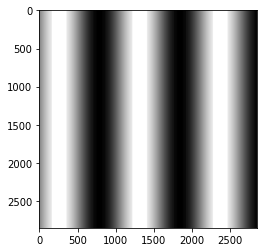

In [34]:
levels = [0.000001, 0.005, 0.0015, 0.02, 0.03, 0.078125, 0.09375, 0.109375, 0.125, 0.140625, 0.15625, 0.171875, 0.1875, 0.203125, 0.21875, 0.234375, 0.25, 0.265625, 0.28125, 0.296875, 0.3125, 0.328125, 0.34375, 0.359375, 0.375, 0.390625, 0.40625, 0.421875, 0.4375, 0.453125, 0.46875, 0.484375, 0.5, 0.515625, 0.53125, 0.546875, 0.5625, 0.578125, 0.59375, 0.609375, 0.625, 0.640625, 0.65625, 0.671875, 0.6875, 0.703125, 0.71875, 0.734375, 0.75, 0.765625, 0.78125, 0.796875, 0.8125, 0.828125, 0.84375, 0.859375, 0.875, 0.890625, 0.90625, 0.921875, 0.45, 0.45, 0.45, 0.45, 1.0]

N = irregular_quantization(b, low, upper, levels)
picIQ = image(N)   

MSE1 = round(mse(picQ, picIQ) /255, 4)

print (MSE1)

PSNR1 = round(psnr(picQ, picIQ, data_range=255), 2)
print(PSNR1)

SSIM1 = round((ssim(picQ, picIQ, data_range=255)), 4)
print(SSIM1)
